In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/behaviour_simulation_train.xlsx - Sheet1.csv")
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
df.shape

(17331, 7)

In [ ]:
df.isnull().sum()

,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0


In [ ]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-12-58ea6ea02cfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


<Axes: xlabel='likes', ylabel='Count'>

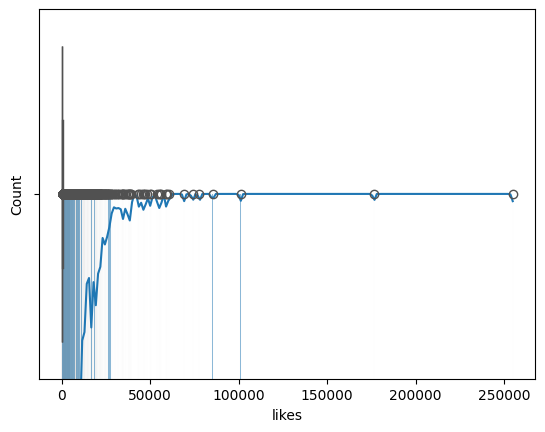

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["likes"],kde=True)
sns.boxplot(x=df["likes"])

In [ ]:
print("X_train columns:", X_train.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

X_train columns: ['id', 'has_media', 'hour', 'word_count', 'char_count', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'inferred company_aaa', 'inferred company_aarp', 'inferred company_accenture', 'inferred company_acer', 'inferred company_airasia', 'inferred company_airtel', 'inferred company_alaska airlines', 'inferred company_alcoa', 'inferred company_allstate', 'inferred company_amazon', 'inferred company_amc', 'inferred company_amd', 'inferred company_american express', 'inferred company_american family insurance', 'inferred company_amp', 'inferred company_amtrak', 'inferred company_amway', 'inferred company_arc', 'inferred company_arm', 'inferred company_asda', 'inferred company_astro', 'inferred company_asus', 'inferred company_aviva', 'inferred company_avon', 'inferred company_axa', 'inferred company_bacardi', 'inferred company_bar', 'inferred company_bayer', 'inferred company_belk', 

In [ ]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)
df = pd.get_dummies(df, columns=['day_of_week',"inferred company"], drop_first=True)


KeyError: "['inferred company'] not in index"

In [ ]:
# Define high/low likes as binary categories (e.g., above median = 1, below = 0)
median_likes = df['likes'].median()
df['likes_category'] = (df['likes'] >= median_likes).astype(int)  # 1: High likes, 0: Low likes

In [ ]:
df.head()

,id,date,likes,content,username,media,has_media,datetime,hour,word_count,...,inferred company_walmart,inferred company_wells fargo,inferred company_western union,inferred company_williams,inferred company_wwf,inferred company_yahoo,inferred company_ymca,inferred company_zumba,day_of_week,likes_category
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,True,2020-12-12 00:47:00,0,29,...,False,False,False,False,False,False,False,False,Saturday,0
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,True,2018-06-30 10:04:20,10,10,...,False,False,False,False,False,False,False,False,Saturday,1
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,True,2020-09-29 19:47:28,19,14,...,False,False,False,False,False,False,False,False,Tuesday,0
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,True,2020-10-01 11:40:09,11,22,...,False,False,False,True,False,False,False,False,Thursday,1
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,True,2018-10-19 14:30:46,14,26,...,False,False,False,False,False,False,False,False,Friday,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Define target and features
y = df['likes_category']  # Binary target variable
X = df.drop(columns=['likes', 'likes_category', 'datetime', 'date', 'content', 'media', 'username'])  # Features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(17331, 205) (13864, 205) (3467, 205)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Saturday'